In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import math
import scikitplot as skplt
import statistics as st
import heapq
import operator
from mpl_toolkits.mplot3d import Axes3D 
import errno
from itertools import islice
from password_strength import PasswordStats
!pip install password-strength

In [2]:
def mkdir_p(path):
    """To make a directory given a path."""
    try:
        os.makedirs(path)
    except OSError as exc:  # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

In [4]:
folder = '20210706_spacy_3.0.3_attack_MIA_epochs_75_batch_size_dataset_i2b2_n2c2_train_data_SECRET_size_more_than_5_count_50'

# Load results for plotting
#res_folder = 'Results/results_{}_len/'.format(secret_len)
res_folder = 'Results/{}/'.format(folder)

files = os.listdir(res_folder)

g = []
br = 0
for file_name in files:
    br += 1
    print(file_name)
    file_path = os.path.join(res_folder, file_name)
    h = pickle.load(open(file_path, 'rb'))
    g.append(h)
print('Read Disk')
print('{} TEST RUNS FOUND'.format(len(g)))

plt_folder = 'Results/{}_PLOTS/'.format(folder)

mkdir_p(plt_folder)

en_core_web_lg_results_label_50.pickle3
Read Disk
1 TEST RUNS FOUND


In [11]:
len(g[0])

9

In [4]:
avg_epoch_exposure_per_password = {g[i][1].split()[-1]:None for i in range(len(g))}
avg_epoch_rank_per_password = {g[i][1].split()[-1]:None for i in range(len(g))}

for i in range(len(g)):
    avg_epoch_exposure = {key:[] for key in g[i][5][0]}
    avg_epoch_rank = {key:[] for key in g[i][5][0]}
    
    for subrun in g[i][5]:
        secret = g[i][1].split()[-1]
        for key in subrun:
            sorted_exposure = dict(sorted(subrun[key].items(), key=operator.itemgetter(1), reverse=True))
            avg_epoch_exposure[key].append(subrun[key][secret])
            avg_epoch_rank[key].append(list(sorted_exposure.keys()).index(secret))

            
    for key in avg_epoch_exposure:
        avg_epoch_exposure[key] = np.mean(np.array(avg_epoch_exposure[key]))
        
    for key in avg_epoch_rank:
        avg_epoch_rank[key] = np.mean(np.array(avg_epoch_rank[key]))

    avg_epoch_exposure_per_password[secret] = avg_epoch_exposure
    avg_epoch_rank_per_password[secret] = avg_epoch_rank
   

In [5]:
epoch_insertion_rank_per_password = {g[i][1].split()[-1]:[] for i in range(len(g))}
for i in avg_epoch_rank_per_password:
    for j in avg_epoch_rank_per_password[i].keys():
        secret = i
        epoch_insertion_rank_per_password[i].append((j[0],j[1],avg_epoch_rank_per_password[i][j]))

In [6]:
epoch_insertion_rank_per_password

{'shashi': []}

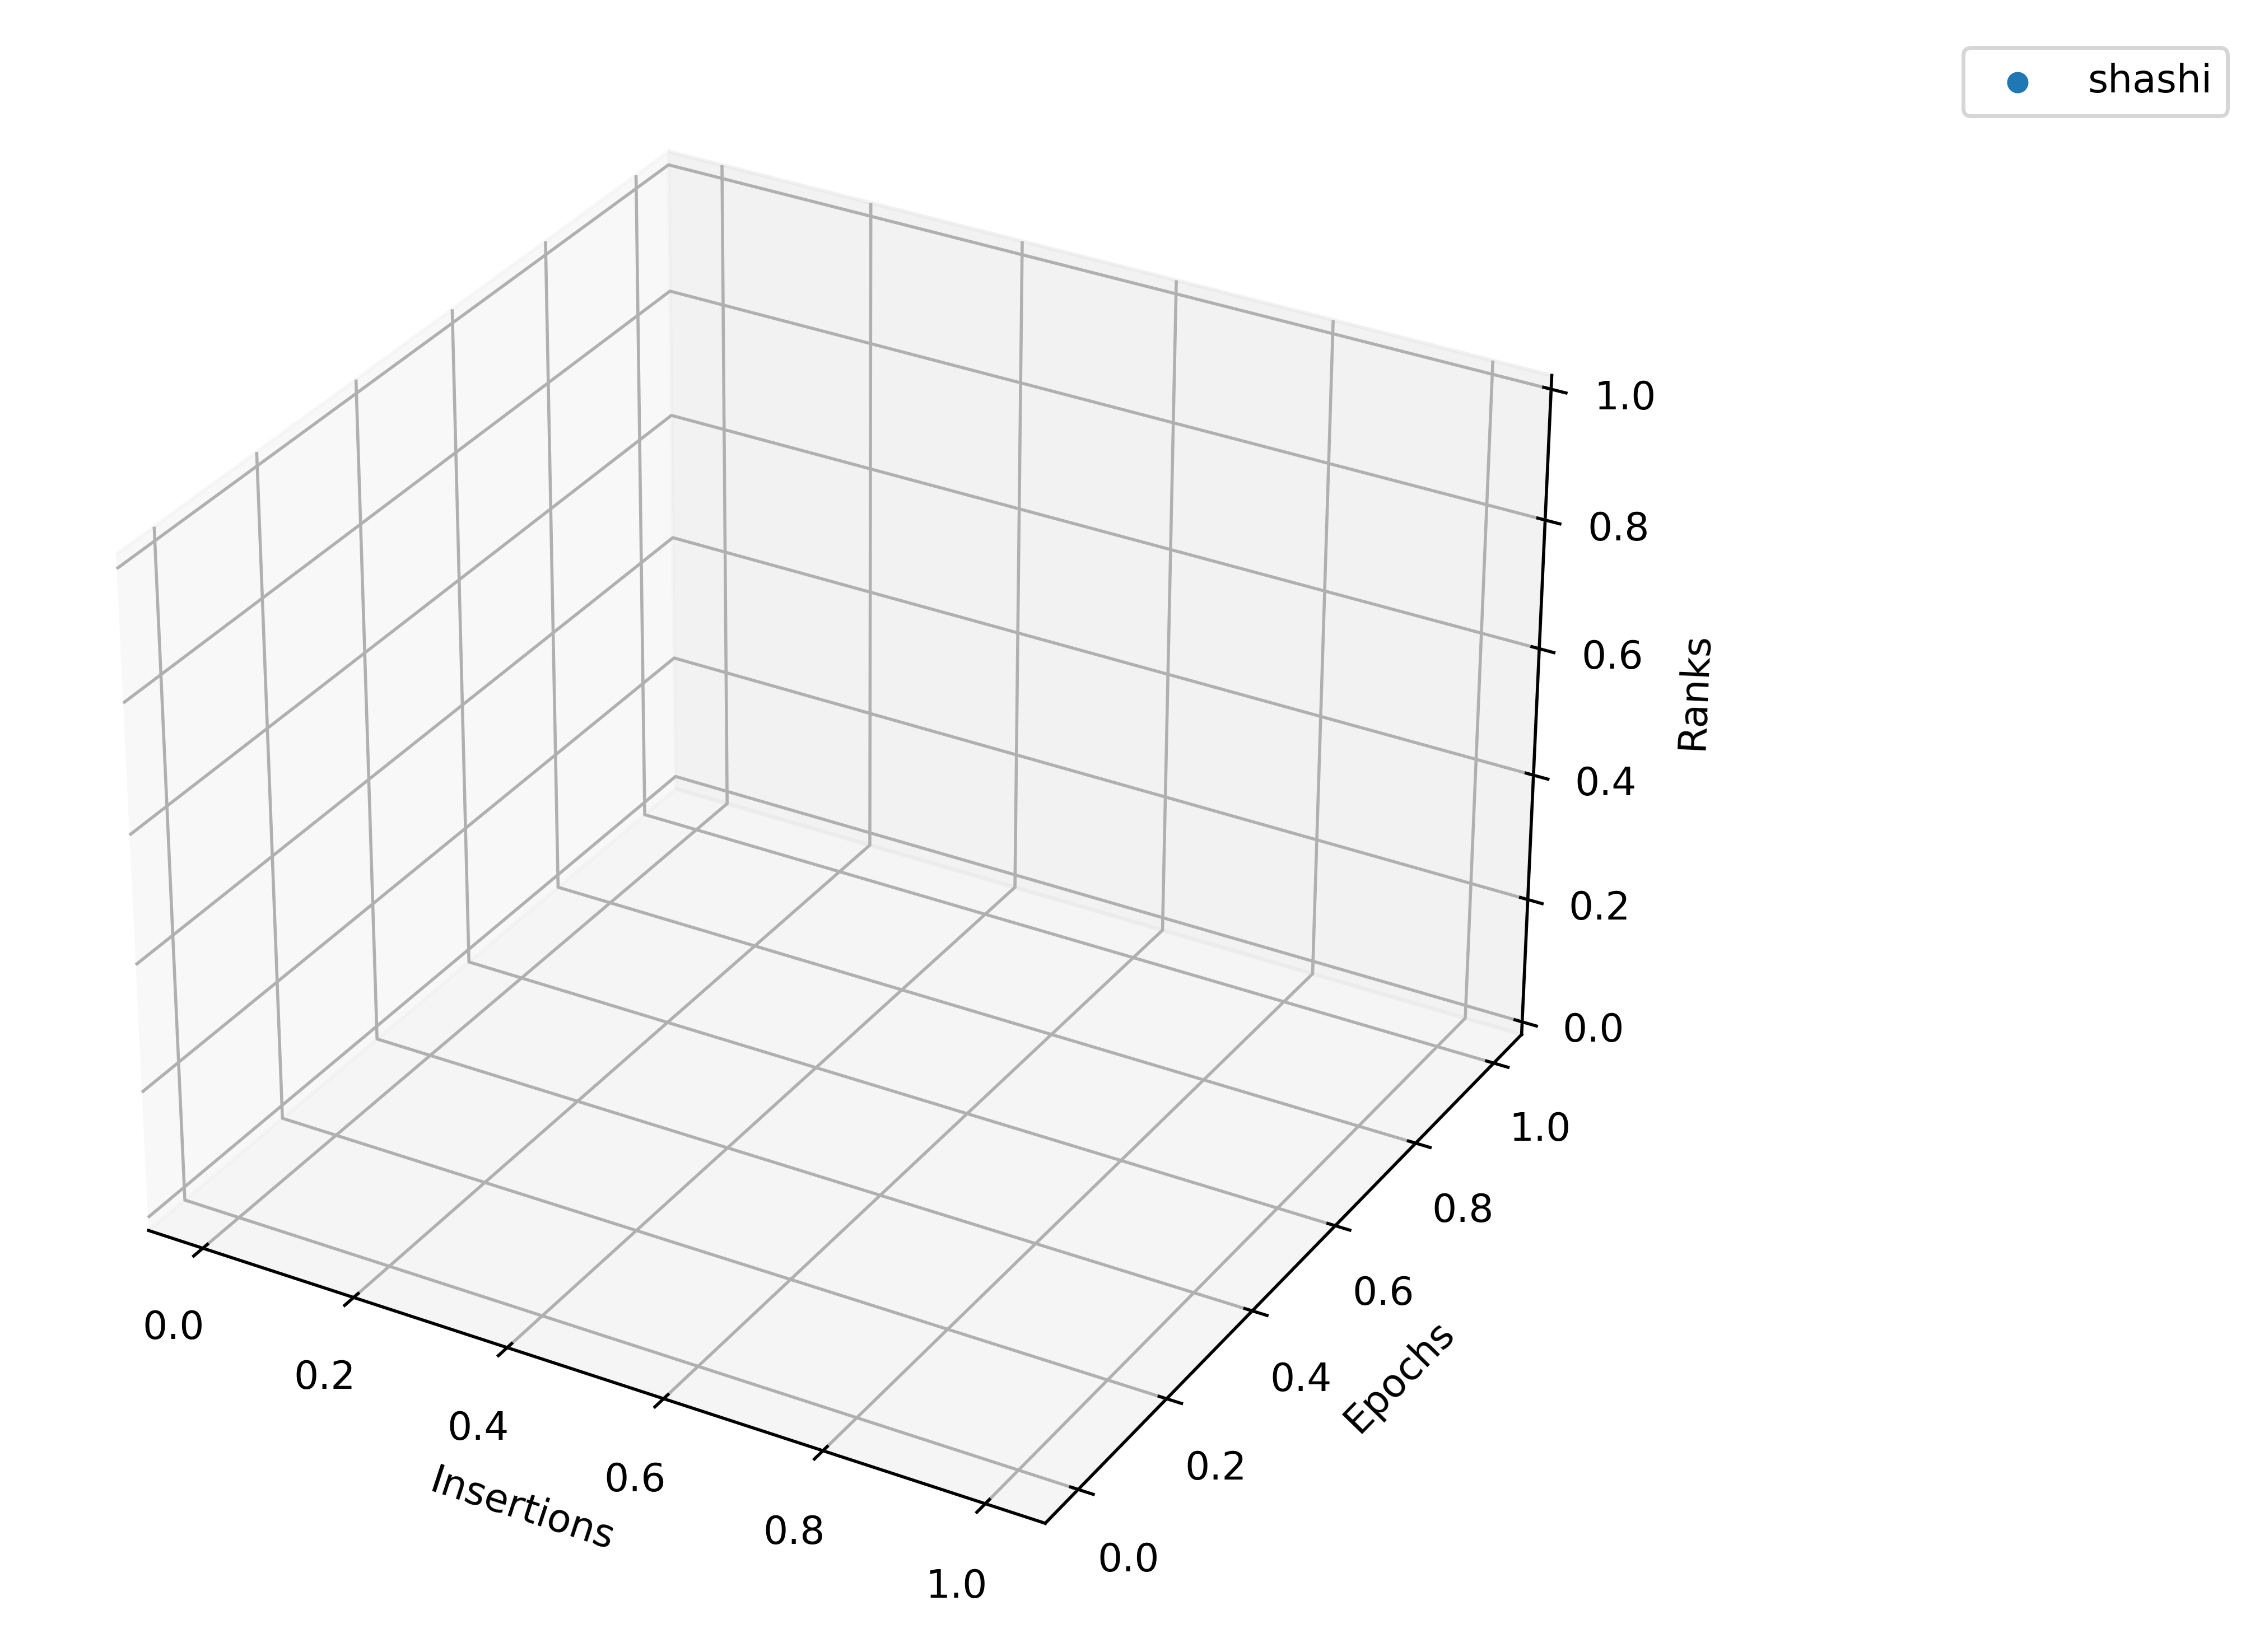

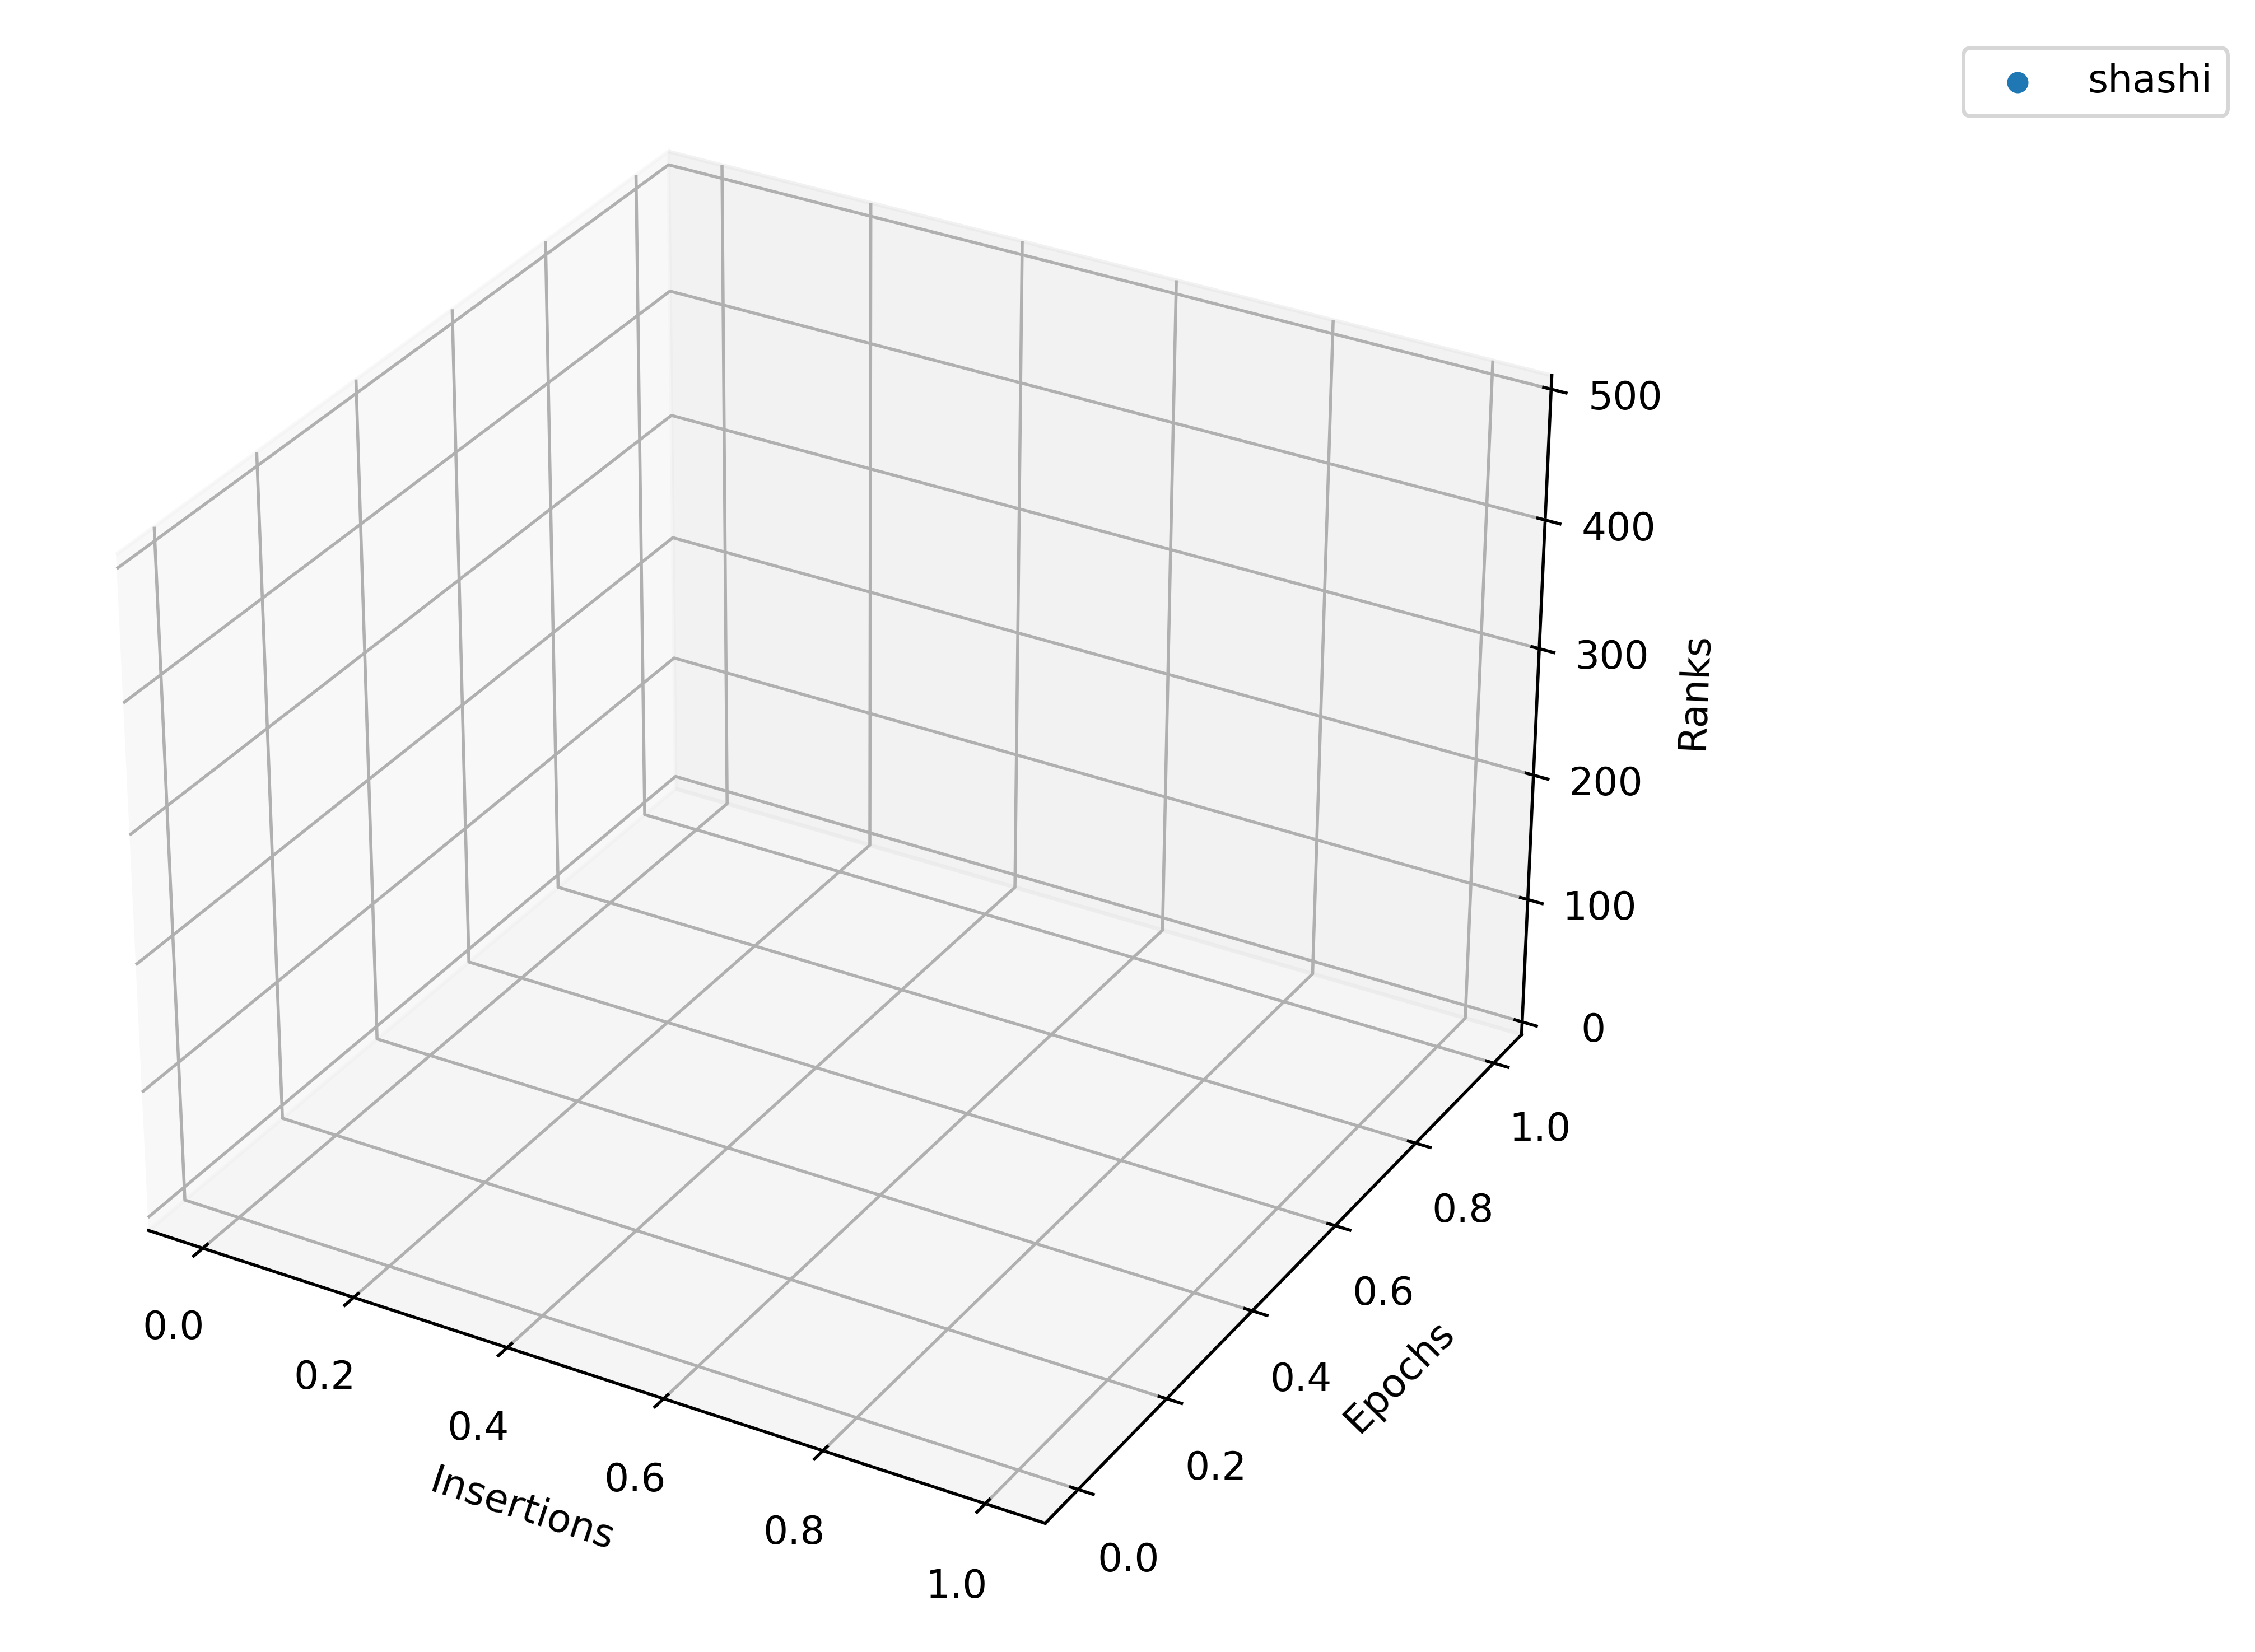

In [7]:
#FIGURE 0 EPOCH VS INSERTIONS VS RANKS

fig = plt.figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')

for i in epoch_insertion_rank_per_password:
    
    epochs = []
    insertions = []
    ranks = []
    for j in epoch_insertion_rank_per_password[i]:
        epochs.append(j[0])
        insertions.append(j[1])
        ranks.append(j[2])
    
     

    pr = fig.gca(projection='3d') 

    pr.scatter(insertions, epochs, ranks, label=i)
    
    pr.set_ylabel("Epochs")
    pr.set_xlabel("Insertions")
    pr.set_zlabel("Ranks")
    #pr.set_zlim(0,500)
    
plt.legend(bbox_to_anchor=(1.20, 1), loc='upper left')
plt.tight_layout()
plt_dest = plt_folder + 'RANK_PER_EPOCH_AND_INSERTION'
plt.savefig(plt_dest,
        bbox_inches="tight")


#FIGURE 0.1 EPOCH VS INSERTIONS VS RANKS 2X

fig = plt.figure(num=None, figsize=(8, 6), dpi=500, facecolor='w', edgecolor='k')

for i in epoch_insertion_rank_per_password:
    
    epochs = []
    insertions = []
    ranks = []
    for j in epoch_insertion_rank_per_password[i]:
        epochs.append(j[0])
        insertions.append(j[1])
        ranks.append(j[2])
    
     

    pr = fig.gca(projection='3d') 

    pr.scatter(insertions, epochs, ranks, label=i)
    
    pr.set_ylabel("Epochs")
    pr.set_xlabel("Insertions")
    pr.set_zlabel("Ranks")
    pr.set_zlim(0,500)
    
plt.legend(bbox_to_anchor=(1.20, 1), loc='upper left')
plt.tight_layout()
plt_dest = plt_folder + 'RANK_PER_EPOCH_AND_INSERTION_ZOOMED'
plt.savefig(plt_dest,
        bbox_inches="tight")

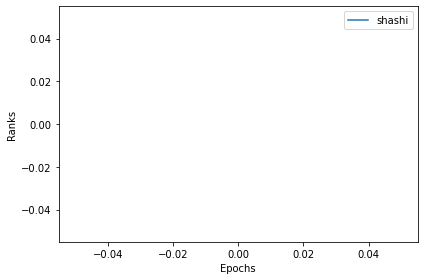

In [8]:
#FIGURE 1 - RANK PER EPOCH/INSERTIONS

plt.figure()

for i in avg_epoch_rank_per_password:
    epochs = [key[0] for key in avg_epoch_rank_per_password[i].keys()]
    ranks = avg_epoch_rank_per_password[i].values()
    
    plt.xlabel('Epochs')
    plt.ylabel('Ranks')
    plt.plot(epochs, ranks, label = i)
plt.legend()
plt.tight_layout()
plt_dest = plt_folder + 'RANK_PER_EPOCH_OR_INSERTION'
plt.savefig(plt_dest,
        bbox_inches="tight")

In [17]:
secret = g[0][1].split()[-1]
print(secret)

shashi


In [34]:
#PASSWORD DICTIONARY

agg_exposures = {}
exposure_rank_per_code = {}
avg_exposure_rank_per_secret = {g[i][1].split()[-1]:[] for i in range(len(g))}
avg_exposure_per_secret = {g[i][1].split()[-1]:[] for i in range(len(g))}  
    
    
agg_scores = {}
ranks_per_code = {}
avg_rank_per_secret = {g[i][1].split()[-1]:[] for i in range(len(g))}
avg_score_per_secret = {g[i][1].split()[-1]:[] for i in range(len(g))}

password_Stat = {}

for i in range(len(g)):
    agg_scores = {}
    agg_exposures = {}
    ranks_per_code = {}
    exposure_rank_per_code = {}
    scores = g[i][0]
    exposures = g[i][4]
    epoch_scores = g[i][5]
    #print(epoch_scores)
    secret = g[i][1].split()[-1]
    print(secret)
    for score in scores:
        sorted_score = dict(sorted(score.items(), key=operator.itemgetter(1), reverse=True))
        rank = 1
        for code in sorted_score.items():
            if code[0] not in agg_scores.keys():
                agg_scores[code[0]] = []
                ranks_per_code[code[0]] = []
                ranks_per_code[code[0]].append(rank)
                agg_scores[code[0]].append(code[1])
                rank+=1
            else:    
                ranks_per_code[code[0]].append(rank)
                agg_scores[code[0]].append(code[1])
                rank+=1
    for exposure in exposures:
        sorted_exposure = dict(sorted(exposure.items(), key=operator.itemgetter(1), reverse=True))
        rank = 1
        for code in sorted_exposure.items():
            if code[0] not in agg_exposures.keys():
                agg_exposures[code[0]] = []
                exposure_rank_per_code[code[0]] = []
                exposure_rank_per_code[code[0]].append(rank)
                agg_exposures[code[0]].append(code[1])
                rank+=1
            else:    
                exposure_rank_per_code[code[0]].append(rank)
                agg_exposures[code[0]].append(code[1])
                rank+=1
    
    
    
    #print(secret, np.array(exposure_rank_per_code[secret]))
    
    avg_exposure_rank_per_secret[secret] = np.mean(np.array(exposure_rank_per_code[secret]))
    avg_exposure_per_secret[secret] = np.mean(np.array(agg_exposures[secret]))
    
    avg_rank_per_secret[secret] = np.mean(np.array(ranks_per_code[secret]))
    avg_score_per_secret[secret] = np.mean(np.array(agg_scores[secret]))
    
    password_Stat[secret] = PasswordStats(secret)

jumpma
444444a
inxisgood
8010741
casynufe
gaVtv9cw
8752058
ahvab76d
123456789as
bird41


In [29]:
(g[0][5])

[{0: ({'mscd02': 0.25907828970671803,
    '71121w': 0.4608467172894726,
    'WXRPTBUQ': 0.1498737787267054,
    'wolfenstien': 0.3358866359371135,
    '154580': 0.31969901921036203,
    'Wolf1976': 0.5874227843150357,
    'krasotka777': 0.19239545714315592,
    '031172': 0.3278006954343227,
    'glnakd': 0.3105752267332977,
    'aqpypaz8': 0.2359361601250746,
    '535153': 0.23808353028457702,
    'aleah5': 0.3159081484226677,
    'werthrfs': 0.4408691422922733,
    'Virtue1': 0.32115194808874054,
    '27031980': 0.4154385602554243,
    'tbs1024': 0.6591651592504982,
    'leem': 0.3007829816378647,
    'yes1000': 0.444216665297413,
    'bezengi01': 0.1903143437472315,
    'treble20': 0.17165087566281276,
    'password10': 0.17562862588819914,
    'he8drx': 0.21261744063940974,
    'bubbad': 0.6729360366459956,
    'nruboc1': 0.2464520270315332,
    'pussy08': 0.20995223670921015,
    '16091948': 0.18510236531816732,
    'watch4lif': 0.30106651790772676,
    'alexsilva': 0.4469540515259

In [13]:
secret, avg_exposure_rank_per_secret

('pickups',
 {'williamJustinB.': 3.8125,
  'zaza1998': 24.666666666666668,
  'memole': 5.5625,
  'ybrbnj4rf96': 6.020833333333333,
  'zfrs0xdw': 28.458333333333332,
  'ata176': 5.979166666666667,
  'SHEEZY': 15.604166666666666,
  'godric': 20.25,
  'zomer99': 21.125,
  'pickups': 3.0416666666666665})

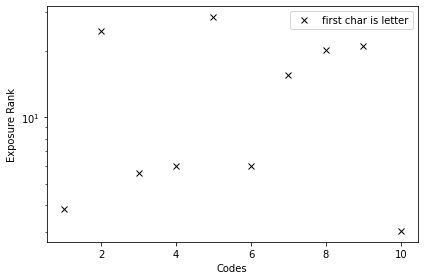

In [14]:
#FIGURE 1 - DIGITS vs LETTERS

index = 1
label1 = True
label2 = True
for password, rank in avg_exposure_rank_per_secret.items():
    if password[0].isdigit():
        plt.plot(index, rank, 'ok', label="first char is digit" if label1 else "")
        label1 = False
    else:
        plt.plot(index, rank, 'xk', label="first char is letter" if label2 else "")
        label2 = False
    index+=1
plt.xlabel("Codes")
plt.ylabel("Exposure Rank")
plt.yscale("log")
#plt.ylim(0,200)
plt.legend()
plt.tight_layout()
plt_dest = plt_folder + 'DIGITS_VS_LETTERS_EXPOSURE_RANKS'
plt.savefig(plt_dest,
        bbox_inches="tight")



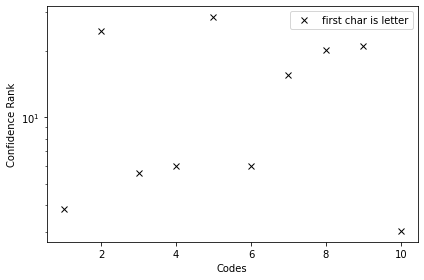

In [15]:
#FIGURE 1 - DIGITS vs LETTERS

index = 1
label1 = True
label2 = True
for password, rank in avg_rank_per_secret.items():
    if password[0].isdigit():
        plt.plot(index, rank, 'ok', label="first char is digit" if label1 else "")
        label1 = False
    else:
        plt.plot(index, rank, 'xk', label="first char is letter" if label2 else "")
        label2 = False
    index+=1
plt.xlabel("Codes")
plt.ylabel("Confidence Rank")
plt.yscale("log")
#plt.ylim(0,200)
plt.legend()
plt.tight_layout()
plt_dest = plt_folder + 'DIGITS_VS_LETTERS_SCORE_RANKS'
plt.savefig(plt_dest,
        bbox_inches="tight")


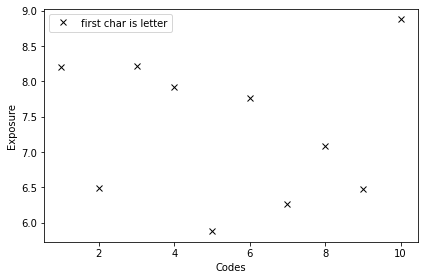

In [16]:
#FIGURE 1 - DIGITS vs LETTERS EXPOSURES

index = 1
label1 = True
label2 = True
for password, rank in avg_exposure_per_secret.items():
    if password[0].isdigit():
        plt.plot(index, rank, 'ok', label="first char is digit" if label1 else "")
        label1 = False
    else:
        plt.plot(index, rank, 'xk', label="first char is letter" if label2 else "")
        label2 = False
    index+=1
plt.xlabel("Codes")
plt.ylabel("Exposure")
#plt.yscale("log")
#plt.ylim(0,200)
plt.legend()
plt.tight_layout()
plt_dest = plt_folder + 'DIGITS_VS_LETTERS_EXPOSURE'
plt.savefig(plt_dest,
        bbox_inches="tight")

In [17]:
digits_vs_letter = {key:[] for key in ['digits', 'letters']}
for password, avg in avg_rank_per_secret.items():
    if password[0].isdigit():
        digits_vs_letter['digits'].append(avg)
    else:
        digits_vs_letter['letters'].append(avg)

In [18]:
#FIGURE DIGITS VS LETTERS

x = [np.mean(np.array(digits_vs_letter['digits'])), np.mean(np.array(digits_vs_letter['letters']))]
print(x)

[nan, 13.45208333333333]


/Users/ranasalalali/opt/anaconda3/envs/diffpri-mi/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ranasalalali/opt/anaconda3/envs/diffpri-mi/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

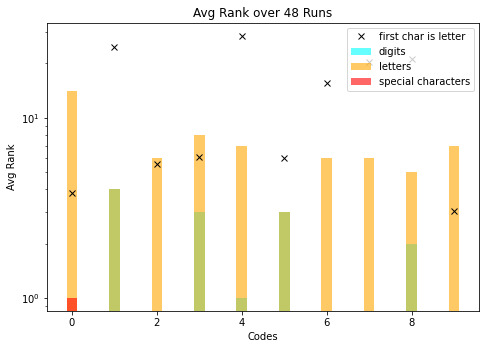

In [19]:
#FIGURE 1 - AVG RANKING PER SECRET

plt.figure()

#newA = dict(sorted(ranks_per_secret.items(), key=operator.itemgetter(1), reverse=False))
newA = avg_rank_per_secret
digits_per_password = {password:stat.numbers for password, stat in password_Stat.items()}
letters_per_password = {password:stat.letters for password, stat in password_Stat.items()}
special_char_per_password = {password:stat.special_characters for password, stat in password_Stat.items()}


lists = newA.items()

x, y = zip(*lists)

x = range(len(x))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

index = 0
label1 = True
label2 = True
for password, rank in avg_rank_per_secret.items():
    if password[0].isdigit():
        plt.plot(index, rank, 'ok', label="first char is digit" if label1 else "")
        label1 = False
    else:
        plt.plot(index, rank, 'xk', label="first char is letter" if label2 else "")
        label2 = False
    index+=1


#plt.plot(x, y, 'xk')
plt.yscale("log")
#plt.ylim(0,10)
ax.bar(x, digits_per_password.values(), alpha = 0.6, color = 'cyan', width = 0.25, label='digits')
ax.bar(x, letters_per_password.values(), alpha = 0.6, color = 'orange', width = 0.25, label='letters')
ax.bar(x, special_char_per_password.values(), alpha = 0.6, color = 'r', width = 0.25, label='special characters')

plt.xlabel('Codes')
plt.ylabel('Avg Rank')
plt.title('Avg Rank over {} Runs'.format(len(g[0][0])))
plt.legend(loc='upper right')
#plt.tight_layout()
plt_dest = plt_folder + 'PASSWORDS_AVERAGE_RANK_WRT_DIGIT_LETTER_COUNT'
plt.savefig(plt_dest,
        bbox_inches="tight")
plt.show()

<Figure size 432x288 with 0 Axes>

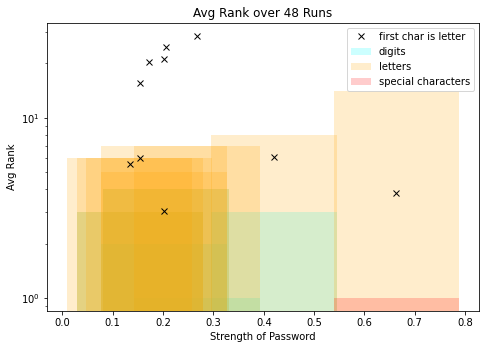

In [20]:
#FIGURE 1 - AVG RANKING PER STRENGTH

plt.figure()

info_per_password = {password:[] for password, stat in password_Stat.items()}

strength_per_password = {password:stat.strength() for password, stat in password_Stat.items()}
digits_per_password = {password:stat.numbers for password, stat in password_Stat.items()}
letters_per_password = {password:stat.letters for password, stat in password_Stat.items()}
special_char_per_password = {password:stat.special_characters for password, stat in password_Stat.items()}


for key in avg_rank_per_secret.keys():
    info_per_password[key].extend([strength_per_password[key], avg_rank_per_secret[key], digits_per_password[key], letters_per_password[key], special_char_per_password[key]])


strength = [value[0] for key, value in info_per_password.items()]
rank = [value[1] for key, value in info_per_password.items()]
digits = [value[2] for key, value in info_per_password.items()]
letters = [value[3] for key, value in info_per_password.items()]
special_chars = [value[4] for key, value in info_per_password.items()]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

label1 = True
label2 = True
for password, stats in info_per_password.items():
    if password[0].isdigit():
        plt.plot(stats[0], stats[1], 'ok', label="first char is digit" if label1 else "")
        label1 = False
    else:
        plt.plot(stats[0], stats[1], 'xk', label="first char is letter" if label2 else "")
        label2 = False
    
#plt.plot(x, y, 'xk')
plt.yscale("log")
#plt.ylim(0,10)
ax.bar(strength, digits_per_password.values(), alpha = 0.2, color = 'cyan', width = 0.25, label='digits')
ax.bar(strength, letters_per_password.values(), alpha = 0.2, color = 'orange', width = 0.25, label='letters')
ax.bar(strength, special_char_per_password.values(), alpha = 0.2, color = 'r', width = 0.25, label='special characters')

#plt.plot(x, y, 'xk')
plt.xlabel('Strength of Password')
plt.ylabel('Avg Rank')
plt.title('Avg Rank over {} Runs'.format(len(g[0][0])))
plt.legend(loc='upper right')
#plt.tight_layout()
plt_dest = plt_folder + 'AVERAGE_RANK_PER_STRENGTH'
plt.savefig(plt_dest,
        bbox_inches="tight")
plt.show()

<Figure size 432x288 with 0 Axes>

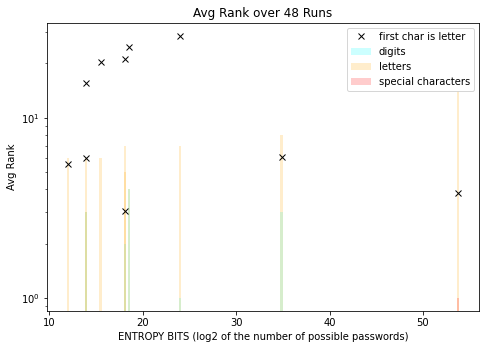

In [21]:
#FIGURE 1 - AVG RANKING PER ENTROPY BITS

plt.figure()

info_per_password = {password:[] for password, stat in password_Stat.items()}

entropy_bits_per_password = {password:stat.entropy_bits for password, stat in password_Stat.items()}
digits_per_password = {password:stat.numbers for password, stat in password_Stat.items()}
letters_per_password = {password:stat.letters for password, stat in password_Stat.items()}
special_char_per_password = {password:stat.special_characters for password, stat in password_Stat.items()}


for key in avg_rank_per_secret.keys():
    info_per_password[key].extend([entropy_bits_per_password[key], avg_rank_per_secret[key], digits_per_password[key], letters_per_password[key], special_char_per_password[key]])


strength = [value[0] for key, value in info_per_password.items()]
rank = [value[1] for key, value in info_per_password.items()]
digits = [value[2] for key, value in info_per_password.items()]
letters = [value[3] for key, value in info_per_password.items()]
special_chars = [value[4] for key, value in info_per_password.items()]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

label1 = True
label2 = True
for password, stats in info_per_password.items():
    if password[0].isdigit():
        plt.plot(stats[0], stats[1], 'ok', label="first char is digit" if label1 else "")
        label1 = False
    else:
        plt.plot(stats[0], stats[1], 'xk', label="first char is letter" if label2 else "")
        label2 = False
    
#plt.plot(x, y, 'xk')
plt.yscale("log")
#plt.ylim(0,10)
ax.bar(strength, digits_per_password.values(), alpha = 0.2, color = 'cyan', width = 0.25, label='digits')
ax.bar(strength, letters_per_password.values(), alpha = 0.2, color = 'orange', width = 0.25, label='letters')
ax.bar(strength, special_char_per_password.values(), alpha = 0.2, color = 'r', width = 0.25, label='special characters')

#plt.plot(x, y, 'xk')
plt.xlabel("ENTROPY BITS (log2 of the number of possible passwords)")
plt.ylabel('Avg Rank')
plt.title('Avg Rank over {} Runs'.format(len(g[0][0])))
plt.legend(loc='upper right')
#plt.tight_layout()
plt_dest = plt_folder + 'AVERAGE_RANK_PER_ENTROPY_BITS'
plt.savefig(plt_dest,
        bbox_inches="tight")
plt.show()

<Figure size 432x288 with 0 Axes>

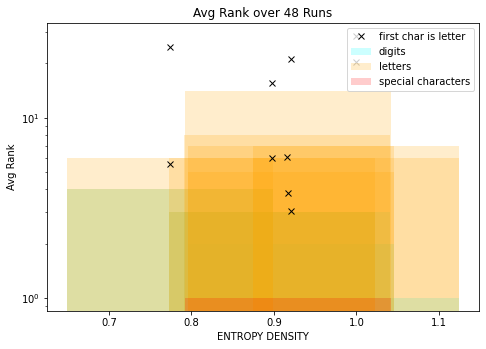

In [22]:
#FIGURE 1 - AVG RANKING PER ENTROPY DENSITY

plt.figure()

info_per_password = {password:[] for password, stat in password_Stat.items()}

entropy_density_per_password = {password:stat.entropy_density for password, stat in password_Stat.items()}
digits_per_password = {password:stat.numbers for password, stat in password_Stat.items()}
letters_per_password = {password:stat.letters for password, stat in password_Stat.items()}
special_char_per_password = {password:stat.special_characters for password, stat in password_Stat.items()}


for key in avg_rank_per_secret.keys():
    info_per_password[key].extend([entropy_density_per_password[key], avg_rank_per_secret[key], digits_per_password[key], letters_per_password[key], special_char_per_password[key]])


strength = [value[0] for key, value in info_per_password.items()]
rank = [value[1] for key, value in info_per_password.items()]
digits = [value[2] for key, value in info_per_password.items()]
letters = [value[3] for key, value in info_per_password.items()]
special_chars = [value[4] for key, value in info_per_password.items()]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

label1 = True
label2 = True
for password, stats in info_per_password.items():
    if password[0].isdigit():
        plt.plot(stats[0], stats[1], 'ok', label="first char is digit" if label1 else "")
        label1 = False
    else:
        plt.plot(stats[0], stats[1], 'xk', label="first char is letter" if label2 else "")
        label2 = False
    
#plt.plot(x, y, 'xk')
plt.yscale("log")
#plt.ylim(0,10)
ax.bar(strength, digits_per_password.values(), alpha = 0.2, color = 'cyan', width = 0.25, label='digits')
ax.bar(strength, letters_per_password.values(), alpha = 0.2, color = 'orange', width = 0.25, label='letters')
ax.bar(strength, special_char_per_password.values(), alpha = 0.2, color = 'r', width = 0.25, label='special characters')

#plt.plot(x, y, 'xk')
plt.xlabel("ENTROPY DENSITY")
plt.ylabel('Avg Rank')
plt.title('Avg Rank over {} Runs'.format(len(g[0][0])))
plt.legend(loc='upper right')
#plt.tight_layout()
plt_dest = plt_folder + 'AVERAGE_RANK_PER_ENTROPY_DENSITY'
plt.savefig(plt_dest,
        bbox_inches="tight")
plt.show()

In [9]:
ps = PasswordStats('qwertyui123')

In [10]:
ps.strength()

0.47125974542430193

In [12]:
math.pow(2, -0.04150266*38.049)

0.3346825621050968

In [13]:
1-(1-0.33333)*0.3346825621050968

0.7768771763213951